In [1]:
from utils.create_folder import create_simulation_folder


In [39]:
results_dir = create_simulation_folder()


[INFO] Simulation folder created: results/2025-10-20_09-17-45


# Corridor restrictions

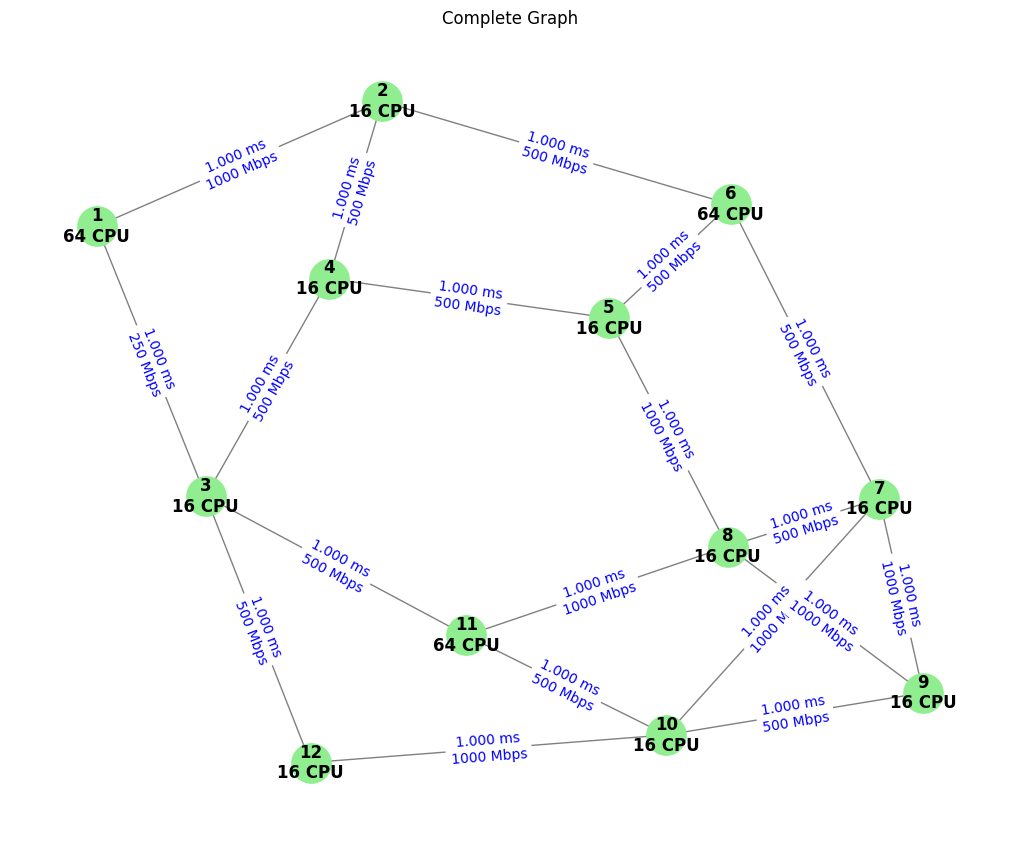

In [40]:
from utils.topology import topology_bayern, draw_graph, topologie_finlande
from utils.generate_slices import generate_random_slices
from milp.topology_to_instance import build_instance_from_topology
from milp.solver_gurobi import solve_gurobi      
from milp.adapter import MILPResultAdapterGurobi

import pandas as pd

# === Topology ===
G = topologie_finlande()
draw_graph(G)


In [41]:

from utils.generate_slices import generate_random_slices


# === Define corridor in the topology ===
vnf_profiles = [
    {"cpu": 2, "throughput": 40, "latency": 120},
    {"cpu": 4, "throughput": 50, "latency": 180},
    {"cpu": 6, "throughput": 60, "latency": 200},
    {"cpu": 8, "throughput": 75, "latency": 250}
]
# === Generate slices ===
slices = generate_random_slices(G, vnf_profiles, num_slices=15, num_vnfs_per_slice=3, entry = 6)
slices

[([{'cpu': 2, 'throughput': 40, 'latency': 120, 'id': 'vnf0_0', 'slice': 0},
   {'cpu': 4, 'throughput': 50, 'latency': 180, 'id': 'vnf0_1', 'slice': 0},
   {'cpu': 6, 'throughput': 60, 'latency': 200, 'id': 'vnf0_2', 'slice': 0}],
  [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 40, 'latency': 120},
   {'from': 'vnf0_1', 'to': 'vnf0_2', 'bandwidth': 50, 'latency': 180}],
  6),
 ([{'cpu': 2, 'throughput': 40, 'latency': 120, 'id': 'vnf1_0', 'slice': 1},
   {'cpu': 4, 'throughput': 50, 'latency': 180, 'id': 'vnf1_1', 'slice': 1},
   {'cpu': 6, 'throughput': 60, 'latency': 200, 'id': 'vnf1_2', 'slice': 1}],
  [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 40, 'latency': 120},
   {'from': 'vnf1_1', 'to': 'vnf1_2', 'bandwidth': 50, 'latency': 180}],
  6),
 ([{'cpu': 2, 'throughput': 40, 'latency': 120, 'id': 'vnf2_0', 'slice': 2},
   {'cpu': 4, 'throughput': 50, 'latency': 180, 'id': 'vnf2_1', 'slice': 2},
   {'cpu': 6, 'throughput': 60, 'latency': 200, 'id': 'vnf2_2', 'slice': 2}],
  

In [42]:

node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}

link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}
link_capacity_base.update({(v, u): G[u][v]["bandwidth"] for u, v in G.edges})

link_latency = {(u, v): G[u][v]["latency"] for u, v in G.edges}
link_latency.update({(v, u): G[u][v]["latency"] for u, v in G.edges})


In [43]:
# === Run heuristics inside the corridor ===
from heuristics.a_star import run_astar
from heuristics.best_fit import run_best_fit
from heuristics.first_fit import run_first_fit
from heuristics.run_abo_full_batch import run_abo_full_batch
from heuristics.run_fabo_full_batch import run_fabo_full_batch

df_astar, results_astar = run_astar(G, slices, node_capacity_base, link_capacity_base)
df_abo, abo_results = run_abo_full_batch(G, slices, node_capacity_base, link_latency, link_capacity_base)
df_fabo, fabo_results = run_fabo_full_batch(G, slices, node_capacity_base, link_latency, link_capacity_base)
df_ff, ff_results = run_first_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)
df_bestfit, bestfit_results = run_best_fit(G, slices, node_capacity_base, link_capacity_base, link_latency)


# === Display results ===
display(df_astar)
display(df_ff)
display(df_abo)
display(df_fabo)
display(df_bestfit)


[INFO][A*] === Solving slice 1 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 1 accepted.


[INFO][A*] === Solving slice 2 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 2 accepted.


[INFO][A*] === Solving slice 3 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 3 accepted.


[INFO][A*] === Solving slice 4 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 4 accepted.


[INFO][A*] === Solving slice 5 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 5 accepted.


[INFO][A*] === Solving slice 6 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 6 accepted.


[INFO][A*] === Solving slice 7 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 7 accepted.


[INFO][A*] === Solving slice 8 (VNFs=3, VLs=2) ===
[INFO][A*] Solution foun

,slice,accepted,g_cost
0,1,True,2.0
1,2,True,2.0
2,3,True,2.0
3,4,True,2.0
4,5,True,2.0
5,6,True,2.0
6,7,True,2.0
7,8,True,2.0
8,9,True,2.0
9,10,True,2.0


,slice,accepted,g_cost
0,1,True,5.0
1,2,True,5.0
2,3,True,4.0
3,4,True,4.0
4,5,True,5.0
5,6,True,5.0
6,7,True,6.0
7,8,True,5.0
8,9,True,5.0
9,10,True,6.0


,slice,accepted,g_cost
0,1,True,3.0
1,2,True,3.0
2,3,True,3.0
3,4,True,3.0
4,5,True,3.0
5,6,True,3.0
6,7,True,3.0
7,8,True,3.0
8,9,True,4.0
9,10,True,4.0


,slice,accepted,g_cost
0,1,True,3.0
1,2,True,3.0
2,3,True,3.0
3,4,True,3.0
4,5,True,3.0
5,6,True,3.0
6,7,True,3.0
7,8,True,4.0
8,9,True,4.0
9,10,True,4.0


,slice,accepted,g_cost
0,1,True,4.0
1,2,True,5.0
2,3,True,4.0
3,4,True,5.0
4,5,True,4.0
5,6,True,5.0
6,7,True,4.0
7,8,True,5.0
8,9,True,4.0
9,10,True,5.0


In [44]:
from utils.generate_graphs import plot_all_routes

[Slice 1] Path ENTRY->vnf0_0: [6]
[Slice 1] Path vnf0_0->vnf0_1: [6, 2]
[Slice 1] Path vnf0_1->vnf0_2: [2, 1]
[Slice 2] Path ENTRY->vnf1_0: [6]
[Slice 2] Path vnf1_0->vnf1_1: [6, 5]
[Slice 2] Path vnf1_1->vnf1_2: [5, 4]
[Slice 3] Path ENTRY->vnf2_0: [6]
[Slice 3] Path vnf2_0->vnf2_1: [6, 7]
[Slice 3] Path vnf2_1->vnf2_2: [7, 8]
[Slice 4] Path ENTRY->vnf3_0: [6]
[Slice 4] Path vnf3_0->vnf3_1: [6, 2]
[Slice 4] Path vnf3_1->vnf3_2: [2, 1]
[Slice 5] Path ENTRY->vnf4_0: [6]
[Slice 5] Path vnf4_0->vnf4_1: [6, 5]
[Slice 5] Path vnf4_1->vnf4_2: [5, 4]
[Slice 6] Path ENTRY->vnf5_0: [6]
[Slice 6] Path vnf5_0->vnf5_1: [6, 7]
[Slice 6] Path vnf5_1->vnf5_2: [7, 9]
[Slice 7] Path ENTRY->vnf6_0: [6]
[Slice 7] Path vnf6_0->vnf6_1: [6, 2]
[Slice 7] Path vnf6_1->vnf6_2: [2, 1]
[Slice 8] Path ENTRY->vnf7_0: [6]
[Slice 8] Path vnf7_0->vnf7_1: [6, 5]
[Slice 8] Path vnf7_1->vnf7_2: [5, 8]
[Slice 9] Path ENTRY->vnf8_0: [6]
[Slice 9] Path vnf8_0->vnf8_1: [6, 7]
[Slice 9] Path vnf8_1->vnf8_2: [7, 10]
[Slice 10

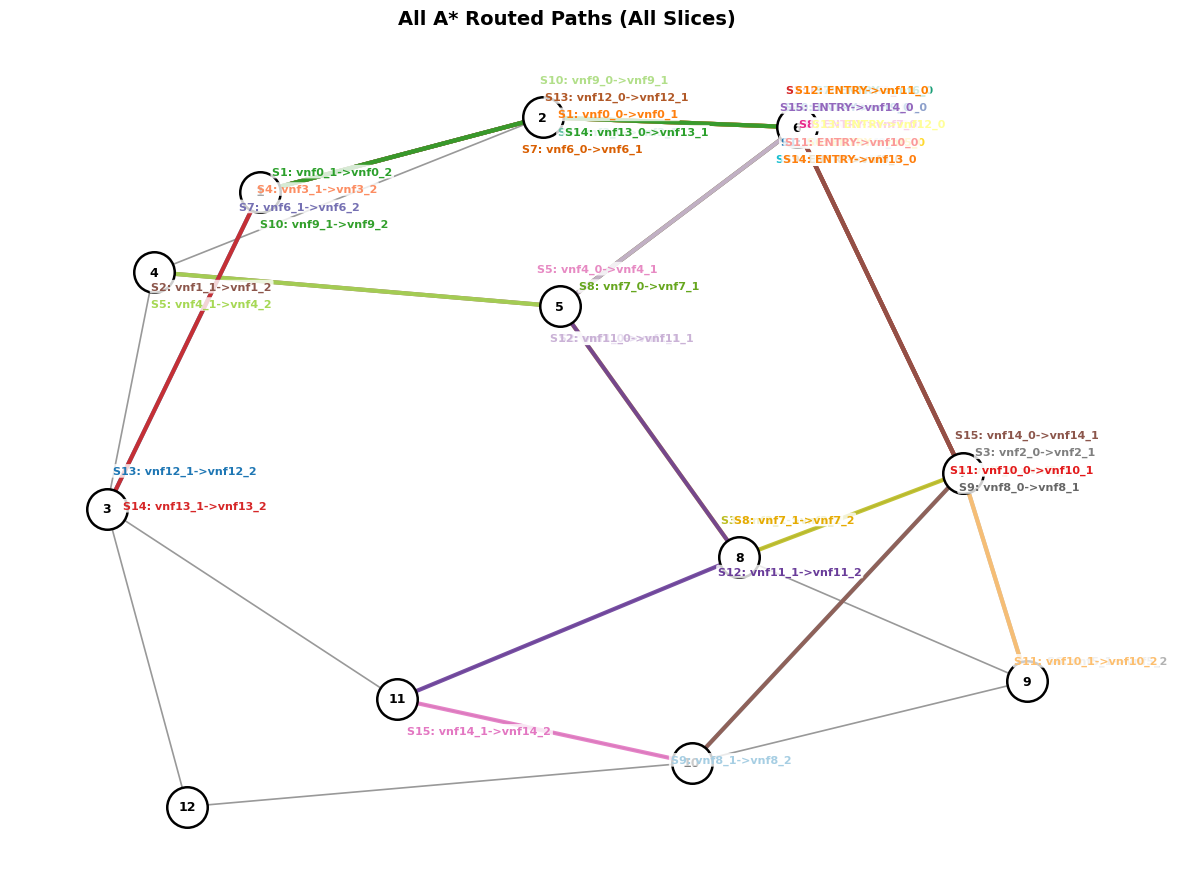

In [45]:
plot_all_routes(G, results_astar, title="All A* Routed Paths (All Slices)")


[Slice 1] Path ENTRY->vnf0_0: [6, 2]
[Slice 1] Path vnf0_0->vnf0_1: [2, 1, 3]
[Slice 1] Path vnf0_1->vnf0_2: [3, 4]
[Slice 2] Path ENTRY->vnf1_0: [6, 2, 4]
[Slice 2] Path vnf1_0->vnf1_1: [4, 3]
[Slice 2] Path vnf1_1->vnf1_2: [3, 1, 2]
[Slice 3] Path ENTRY->vnf2_0: [6, 2]
[Slice 3] Path vnf2_0->vnf2_1: [2, 1, 3]
[Slice 3] Path vnf2_1->vnf2_2: [3, 4]
[Slice 4] Path ENTRY->vnf3_0: [6, 2, 4]
[Slice 4] Path vnf3_0->vnf3_1: [4, 3]
[Slice 4] Path vnf3_1->vnf3_2: [3, 1, 2]
[Slice 5] Path ENTRY->vnf4_0: [6, 5]
[Slice 5] Path vnf4_0->vnf4_1: [5, 6, 7]
[Slice 5] Path vnf4_1->vnf4_2: [7, 8]
[Slice 6] Path ENTRY->vnf5_0: [6, 5, 8]
[Slice 6] Path vnf5_0->vnf5_1: [8, 7]
[Slice 6] Path vnf5_1->vnf5_2: [7, 6, 5]
[Slice 7] Path ENTRY->vnf6_0: [6, 5]
[Slice 7] Path vnf6_0->vnf6_1: [5, 6, 7]
[Slice 7] Path vnf6_1->vnf6_2: [7, 8]
[Slice 8] Path ENTRY->vnf7_0: [6, 5, 8]
[Slice 8] Path vnf7_0->vnf7_1: [8, 7]
[Slice 8] Path vnf7_1->vnf7_2: [7, 6, 5]
[Slice 9] Path ENTRY->vnf8_0: [6, 7, 9]
[Slice 9] Path vnf8_

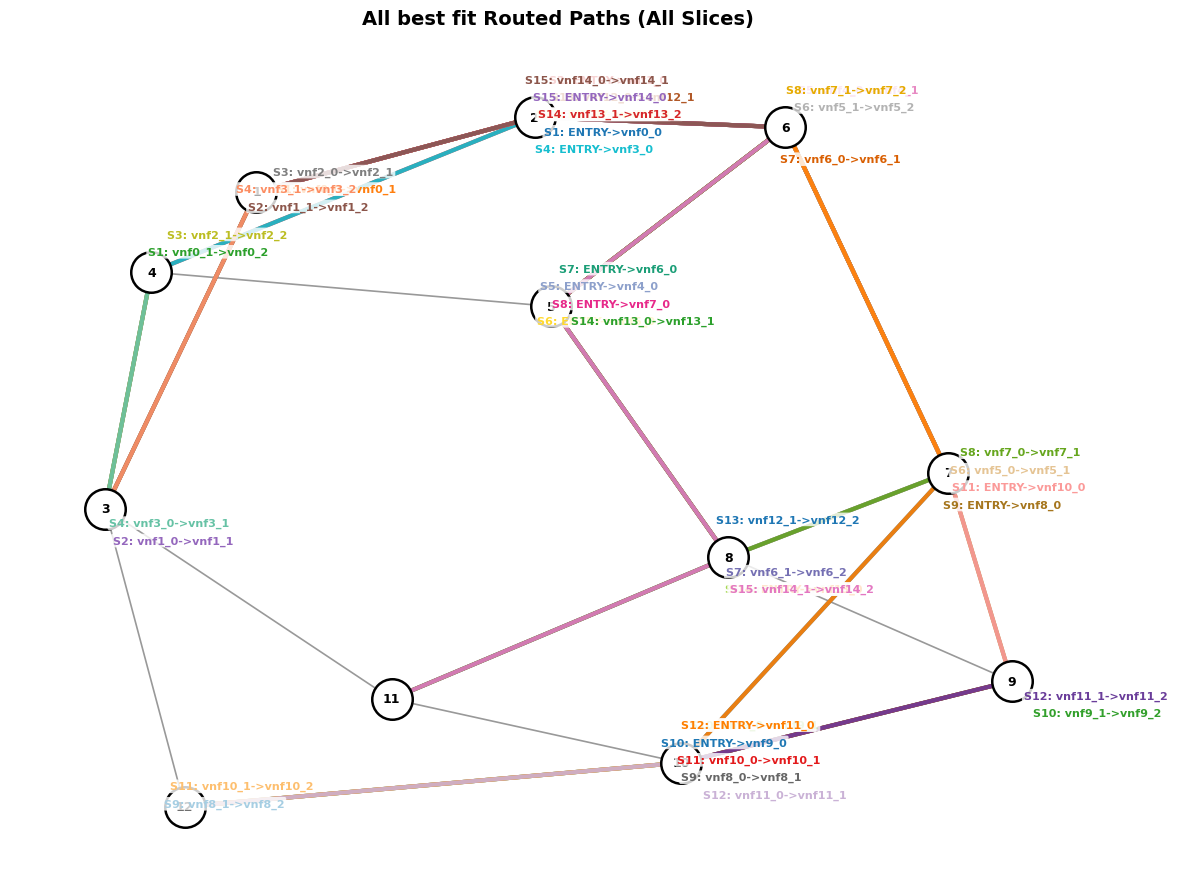

In [46]:
plot_all_routes(G, bestfit_results, title="All best fit Routed Paths (All Slices)")

[Slice 1] Path ENTRY->vnf0_0: [6, 2, 1]
[Slice 1] Path vnf0_0->vnf0_1: [1, 2]
[Slice 1] Path vnf0_1->vnf0_2: [2, 1, 3]
[Slice 2] Path ENTRY->vnf1_0: [6, 2, 1]
[Slice 2] Path vnf1_0->vnf1_1: [1, 2]
[Slice 2] Path vnf1_1->vnf1_2: [2, 1, 3]
[Slice 3] Path ENTRY->vnf2_0: [6, 2, 1]
[Slice 3] Path vnf2_0->vnf2_1: [1, 2]
[Slice 3] Path vnf2_1->vnf2_2: [2, 4]
[Slice 4] Path ENTRY->vnf3_0: [6, 2, 1]
[Slice 4] Path vnf3_0->vnf3_1: [1, 2]
[Slice 4] Path vnf3_1->vnf3_2: [2, 4]
[Slice 5] Path ENTRY->vnf4_0: [6, 2, 1]
[Slice 5] Path vnf4_0->vnf4_1: [1, 3]
[Slice 5] Path vnf4_1->vnf4_2: [3, 4, 5]
[Slice 6] Path ENTRY->vnf5_0: [6, 2, 1]
[Slice 6] Path vnf5_0->vnf5_1: [1, 2, 4]
[Slice 6] Path vnf5_1->vnf5_2: [4, 5]
[Slice 7] Path ENTRY->vnf6_0: [6, 2, 1]
[Slice 7] Path vnf6_0->vnf6_1: [1, 2, 4, 5]
[Slice 7] Path vnf6_1->vnf6_2: [5, 6]
[Slice 8] Path ENTRY->vnf7_0: [6, 2, 1]
[Slice 8] Path vnf7_0->vnf7_1: [1, 2, 6]
[Slice 8] Path vnf7_1->vnf7_2: [6, 7]
[Slice 9] Path ENTRY->vnf8_0: [6, 2, 1]
[Slice 9] P

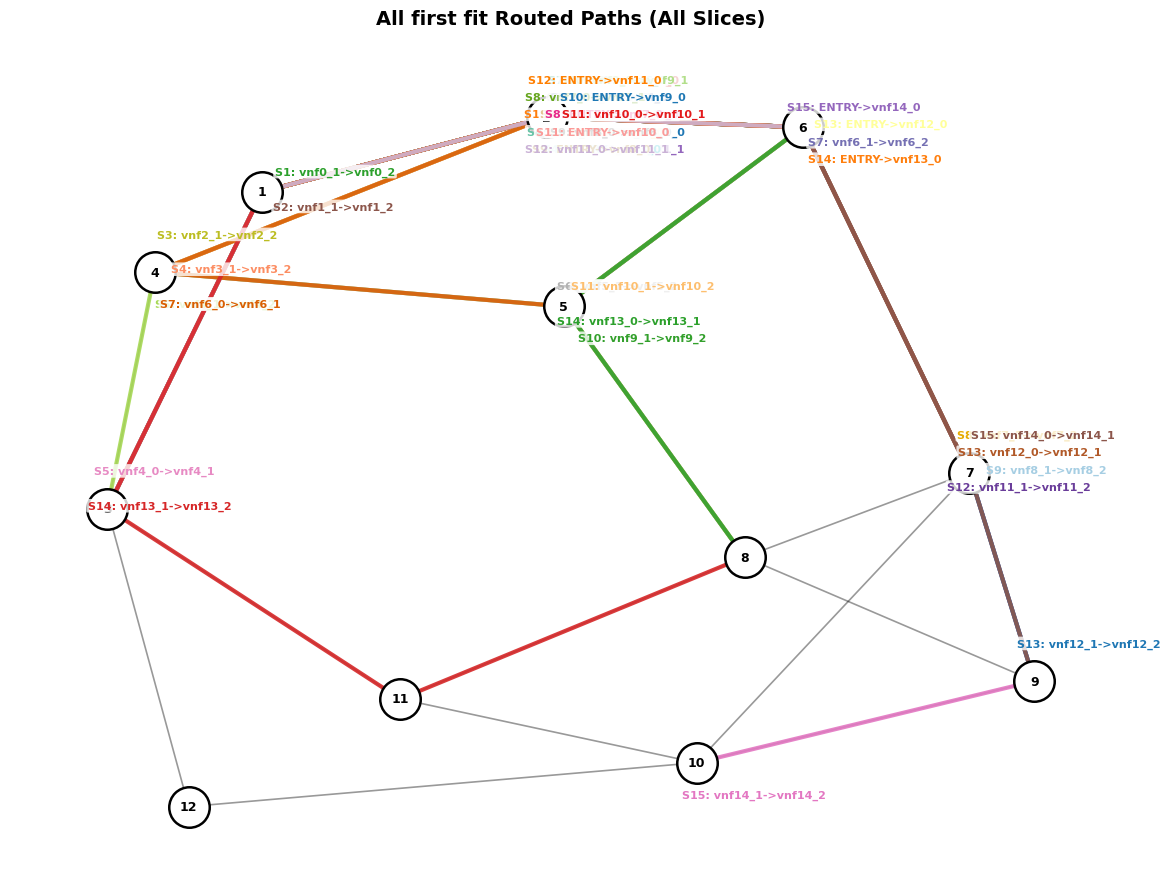

In [47]:
plot_all_routes(G, ff_results, title="All first fit Routed Paths (All Slices)")

[Slice 1] Path ENTRY->vnf0_0: [6, 2]
[Slice 1] Path vnf0_0->vnf0_1: [2, 4]
[Slice 1] Path vnf0_1->vnf0_2: [4, 3]
[Slice 2] Path ENTRY->vnf1_0: [6, 2]
[Slice 2] Path vnf1_0->vnf1_1: [2, 6]
[Slice 2] Path vnf1_1->vnf1_2: [6, 5]
[Slice 3] Path ENTRY->vnf2_0: [6, 2]
[Slice 3] Path vnf2_0->vnf2_1: [2, 4]
[Slice 3] Path vnf2_1->vnf2_2: [4, 5]
[Slice 4] Path ENTRY->vnf3_0: [6, 2]
[Slice 4] Path vnf3_0->vnf3_1: [2, 6]
[Slice 4] Path vnf3_1->vnf3_2: [6, 7]
[Slice 5] Path ENTRY->vnf4_0: [6, 2]
[Slice 5] Path vnf4_0->vnf4_1: [2, 4]
[Slice 5] Path vnf4_1->vnf4_2: [4, 3]
[Slice 6] Path ENTRY->vnf5_0: [6, 2]
[Slice 6] Path vnf5_0->vnf5_1: [2, 6]
[Slice 6] Path vnf5_1->vnf5_2: [6, 7]
[Slice 7] Path ENTRY->vnf6_0: [6, 5]
[Slice 7] Path vnf6_0->vnf6_1: [5, 8]
[Slice 7] Path vnf6_1->vnf6_2: [8, 9]
[Slice 8] Path ENTRY->vnf7_0: [6, 5]
[Slice 8] Path vnf7_0->vnf7_1: [5, 8]
[Slice 8] Path vnf7_1->vnf7_2: [8, 9]
[Slice 9] Path ENTRY->vnf8_0: [6, 2]
[Slice 9] Path vnf8_0->vnf8_1: [2, 1]
[Slice 9] Path vnf8_1

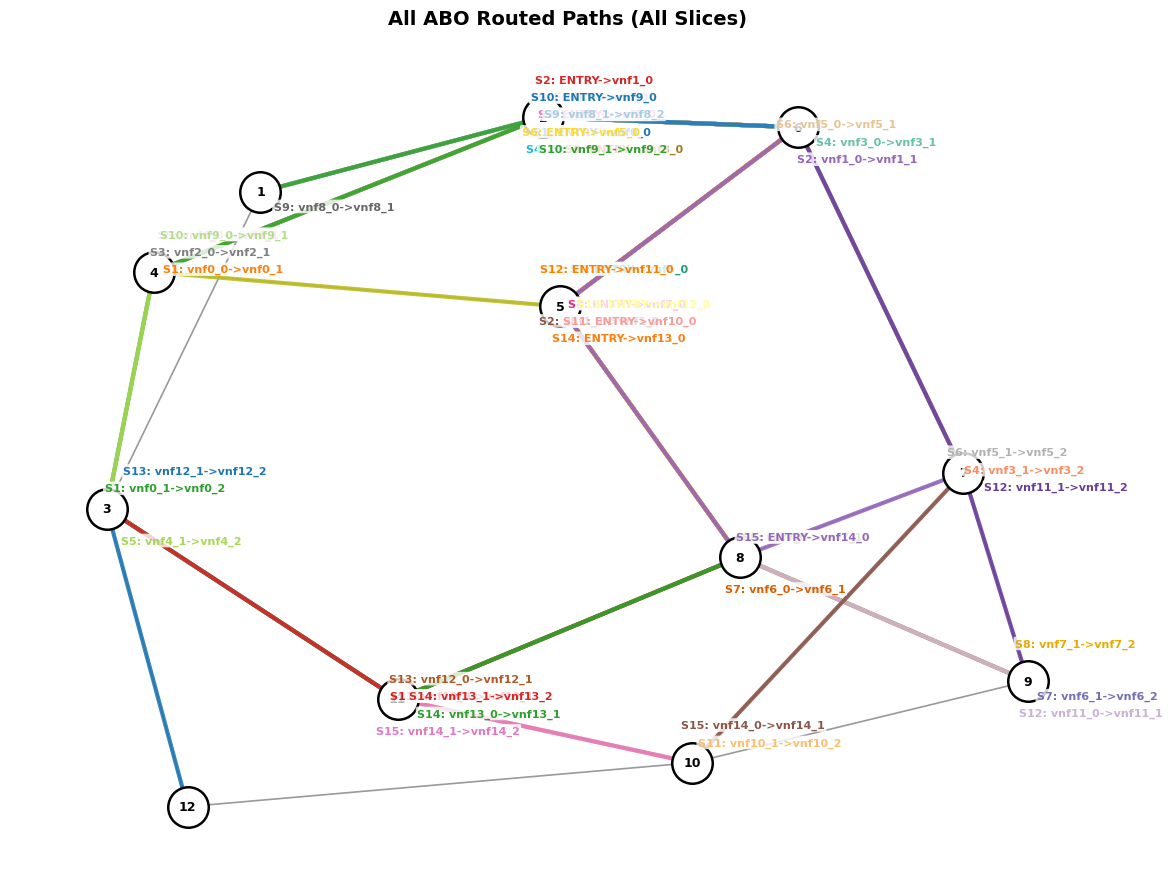

In [48]:
plot_all_routes(G, abo_results, title="All ABO Routed Paths (All Slices)")

[Slice 1] Path ENTRY->vnf0_0: [6, 2]
[Slice 1] Path vnf0_0->vnf0_1: [2, 4]
[Slice 1] Path vnf0_1->vnf0_2: [4, 3]
[Slice 2] Path ENTRY->vnf1_0: [6, 5]
[Slice 2] Path vnf1_0->vnf1_1: [5, 6]
[Slice 2] Path vnf1_1->vnf1_2: [6, 7]
[Slice 3] Path ENTRY->vnf2_0: [6, 2]
[Slice 3] Path vnf2_0->vnf2_1: [2, 6]
[Slice 3] Path vnf2_1->vnf2_2: [6, 5]
[Slice 4] Path ENTRY->vnf3_0: [6, 2]
[Slice 4] Path vnf3_0->vnf3_1: [2, 6]
[Slice 4] Path vnf3_1->vnf3_2: [6, 7]
[Slice 5] Path ENTRY->vnf4_0: [6, 2]
[Slice 5] Path vnf4_0->vnf4_1: [2, 4]
[Slice 5] Path vnf4_1->vnf4_2: [4, 5]
[Slice 6] Path ENTRY->vnf5_0: [6, 2]
[Slice 6] Path vnf5_0->vnf5_1: [2, 4]
[Slice 6] Path vnf5_1->vnf5_2: [4, 3]
[Slice 7] Path ENTRY->vnf6_0: [6, 5]
[Slice 7] Path vnf6_0->vnf6_1: [5, 8]
[Slice 7] Path vnf6_1->vnf6_2: [8, 9]
[Slice 8] Path ENTRY->vnf7_0: [6, 2]
[Slice 8] Path vnf7_0->vnf7_1: [2, 1]
[Slice 8] Path vnf7_1->vnf7_2: [1, 2, 6]
[Slice 9] Path ENTRY->vnf8_0: [6, 2]
[Slice 9] Path vnf8_0->vnf8_1: [2, 4]
[Slice 9] Path vnf

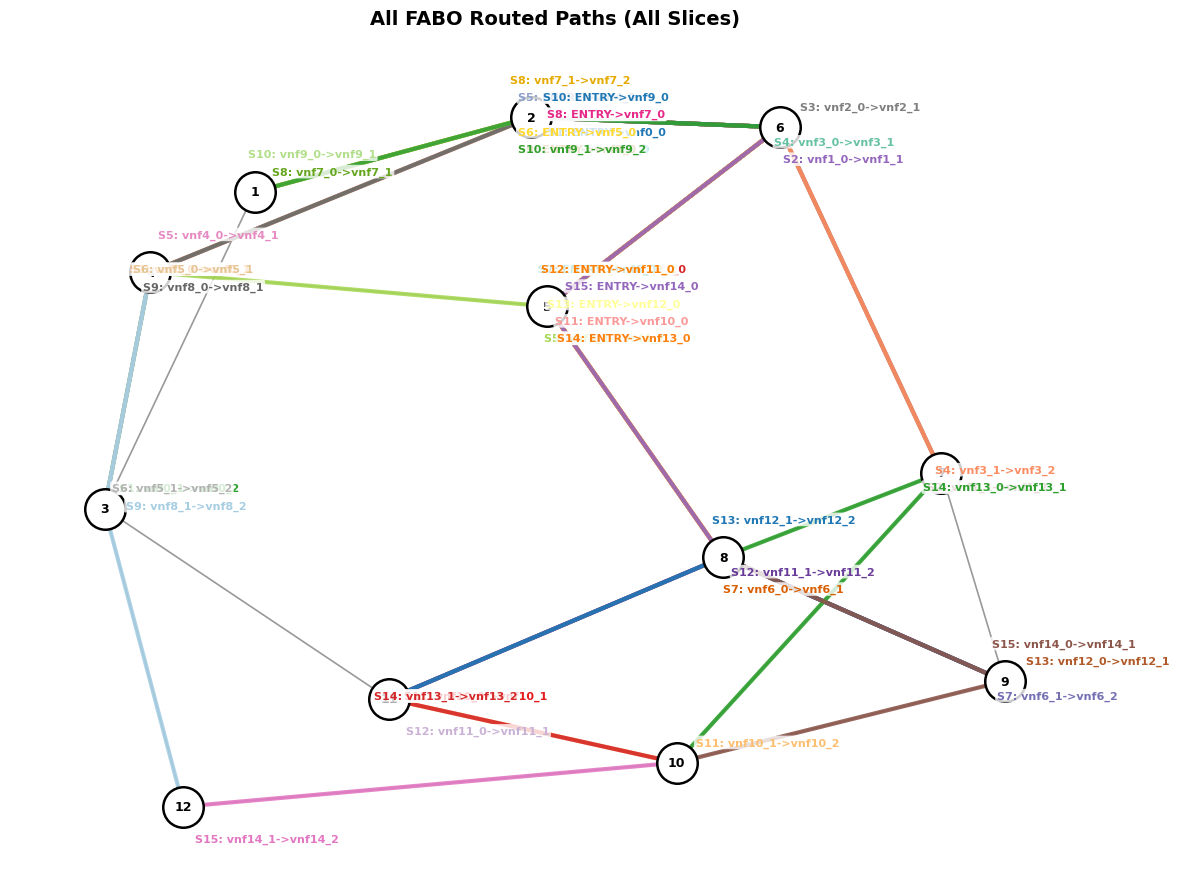

In [49]:
plot_all_routes(G, fabo_results, title="All FABO Routed Paths (All Slices)")

Set parameter OutputFlag to value 1
Set parameter TimeLimit to value 120
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 11 physical cores, 22 logical processors, using up to 22 threads

Non-default parameters:
TimeLimit  120

Optimize a model with 903 rows, 1457 columns and 7428 nonzeros
Model fingerprint: 0x4695004d
Variable types: 31 continuous, 1426 integer (1426 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 497 rows and 1037 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.01 work units)
Thread count was 1 (of 22 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
[MILP] No feasible solution or unsolved. Status: 3 (3)
Gurobi Optimizer ve

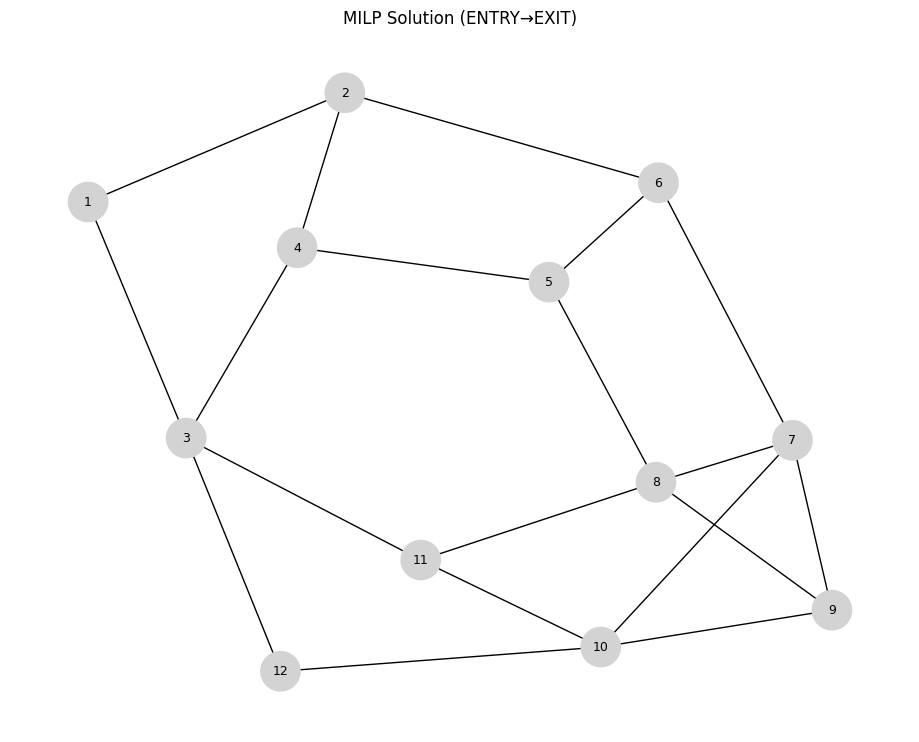

In [50]:
from milp.solver_gurobi import solve_gurobi
from milp.adapter import MILPResultAdapterGurobi
from milp.create_instance import create_instance
from utils.generate_graphs import plot_solution_heuristic

# === 1. Criar instance ===
instance = create_instance(G, slices)
instance.entry_node = 6

# === 2. Rodar o MILP ===
milp_res = solve_gurobi(instance, msg=True, time_limit=120)
# === 3. Adaptar e visualizar ===
milp_adapter = MILPResultAdapterGurobi(milp_res, instance)
print(milp_adapter) 

plot_solution_heuristic(G, milp_adapter, title="MILP Solution (ENTRY→EXIT)")


In [51]:
# === Run MILP ===
from milp.solver_gurobi import solve_gurobi
from milp.adapter import MILPResultAdapterGurobi

instance = create_instance(G, slices)
milp_res = solve_gurobi(instance, msg=True, time_limit=120)
milp_adapter = MILPResultAdapterGurobi(milp_res, instance)

# === Add all methods to comparison dict ===
method_results = {
    "A*": results_astar,
    "ABO": abo_results,
    "FABO": fabo_results,
    "First Fit": ff_results,
    "Best Fit": bestfit_results,
    "MILP (Gurobi)": [milp_adapter],   # ⚠️ important: wrap in list
}


Set parameter OutputFlag to value 1
Set parameter TimeLimit to value 120
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 11 physical cores, 22 logical processors, using up to 22 threads

Non-default parameters:
TimeLimit  120

Optimize a model with 903 rows, 1457 columns and 7428 nonzeros
Model fingerprint: 0x4695004d
Variable types: 31 continuous, 1426 integer (1426 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 497 rows and 1037 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.01 work units)
Thread count was 1 (of 22 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
[MILP] No feasible solution or unsolved. Status: 3 (3)
Gurobi Optimizer ve

In [52]:
from utils.metrics import (
    compute_energy_per_node,
    compute_total_bandwidth,
    compute_total_latency,
    compute_energy_per_slice,
    compute_energy_new,
    compute_milp_bandwidth_latency,
    count_accepted_slices
)

comparison_rows = []

for method_name, result_list in method_results.items():
    if not result_list:
        continue

    # --- Energy metrics ---
    energy_per_slice, _ = compute_energy_per_slice(result_list, slices, node_capacity_base)
    _, _ = compute_energy_per_node(result_list, slices, node_capacity_base)
    normalized_energy = compute_energy_new(result_list, slices, node_capacity_base, link_capacity_base)

    # --- Bandwidth & Latency ---
    if "MILP" in method_name and len(result_list) == 1:
        
        total_bw, total_lat, _, _ = compute_milp_bandwidth_latency(milp_res, instance)
    else:
        total_bw_list = compute_total_bandwidth(result_list, slices)
        total_lat_list = compute_total_latency(result_list, link_latency)
        total_bw = sum(b for b in total_bw_list if b is not None)
        total_lat = sum(l for l in total_lat_list if l is not None)

    # --- Build comparison row ---
    comparison_rows.append({
        "Method": method_name,
        "Slices Accepted": count_accepted_slices(result_list, slices, verbose=False),
        "Total Bandwidth": total_bw,
        "Total Latency": total_lat,
        "Total Energy": normalized_energy
    })

# --- Final DataFrame ---
df_metrics = pd.DataFrame(comparison_rows).reset_index(drop=True)
display(df_metrics)


,Method,Slices Accepted,Total Bandwidth,Total Latency,Total Energy
0,A*,15,1520.0,34.0,33.40125
1,ABO,15,1590.0,56.0,43.32875
2,FABO,15,1680.0,57.0,44.45250
3,First Fit,15,2150.0,72.0,38.15375
4,Best Fit,15,2120.0,76.0,47.39250
5,MILP (Gurobi),0,0.0,0.0,0.00000


In [53]:
import os
os.makedirs(results_dir, exist_ok=True)


In [54]:
df_milp = pd.DataFrame([
    {
        "slice": len(slices),      # número total de slices
        "accepted": True if milp_adapter else False,
        "g_cost": milp_res.objective if milp_res.objective else None
    }
])


In [55]:
from datetime import datetime

num_slices = len(slices)
num_vnfs_total = sum(len(v[0]) for v in slices)

summary_info = {
    "timestamp": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")],
    "num_slices": [num_slices],
    "num_vnfs_total": [num_vnfs_total]
}

import pandas as pd
df_info = pd.DataFrame(summary_info)
df_info.to_csv(f"{results_dir}/experiment_info.csv", index=False)
df_astar.to_csv(f"{results_dir}/astar_results.csv", index=False)
df_abo.to_csv(f"{results_dir}/abo_results.csv", index=False)
df_fabo.to_csv(f"{results_dir}/fabo_results.csv", index=False)
df_bestfit.to_csv(f"{results_dir}/bestfit_results.csv", index=False)
df_ff.to_csv(f"{results_dir}/ff_results.csv", index=False)
df_milp.to_csv(f"{results_dir}/milp_results.csv", index=False)
df_metrics.to_csv(f"{results_dir}/metrics.csv", index=False)


In [56]:
with open(f"{results_dir}/log.txt", "w") as f:
    f.write(f"Experiment timestamp: {datetime.now()}\n")
    f.write(f"Number of slices: {num_slices}\n")
    f.write(f"Number of VNFs: {num_vnfs_total}\n")
    f.write("\n=== Summary ===\n")
    f.write(df_astar.to_string(index=False))
    f.write(df_abo.to_string(index=False))
    f.write(df_fabo.to_string(index=False))
    f.write(df_bestfit.to_string(index=False))
    f.write(df_ff.to_string(index=False))
    f.write(df_metrics.to_string(index=False))
    f.write("\n\n=== MILP ===\n")
    f.write(df_milp.to_string(index=False))

In [57]:
from utils.generate_graphs import plot_cpu_usage
plot_cpu_usage(G, slices, method_results, results_dir)


[INFO] Saved CPU utilization chart to results/2025-10-20_09-17-45/cpu_utilization.png


In [58]:
from milp.helpers import sanity_check_milp_gurobi
sanity_check_milp_gurobi(milp_res, instance, slices)

=== Sanity check MILP (Gurobi) ===
Objective value: None (no optimal solution)
Status: 3

Node CPU usage:
  Node 1: used 0.00 / cap 64.00 
  Node 2: used 0.00 / cap 16.00 
  Node 3: used 0.00 / cap 16.00 
  Node 4: used 0.00 / cap 16.00 
  Node 5: used 0.00 / cap 16.00 
  Node 6: used 0.00 / cap 64.00 
  Node 7: used 0.00 / cap 16.00 
  Node 8: used 0.00 / cap 16.00 
  Node 9: used 0.00 / cap 16.00 
  Node 10: used 0.00 / cap 16.00 
  Node 11: used 0.00 / cap 64.00 
  Node 12: used 0.00 / cap 16.00 

[Slice 0]
  VNF vnf0_0 ✗ NOT allocated
  VNF vnf0_1 ✗ NOT allocated
  VNF vnf0_2 ✗ NOT allocated
  VL (vnf0_0->vnf0_1) ✗ NOT routed
  VL (vnf0_1->vnf0_2) ✗ NOT routed
  → Slice 0 REJECTED ✗

[Slice 1]
  VNF vnf1_0 ✗ NOT allocated
  VNF vnf1_1 ✗ NOT allocated
  VNF vnf1_2 ✗ NOT allocated
  VL (vnf1_0->vnf1_1) ✗ NOT routed
  VL (vnf1_1->vnf1_2) ✗ NOT routed
  → Slice 1 REJECTED ✗

[Slice 2]
  VNF vnf2_0 ✗ NOT allocated
  VNF vnf2_1 ✗ NOT allocated
  VNF vnf2_2 ✗ NOT allocated
  VL (vnf2_0->v

# Load and scalability 

In [34]:
# === Load & Scalability Experiment ===
# All comments in English

import os, random, time
import numpy as np
import pandas as pd
from copy import deepcopy
from datetime import datetime

# --- Imports ---
from utils.topology import topologie_finlande
from utils.generate_slices import generate_random_slices
from heuristics.a_star import run_astar
from heuristics.run_abo_full_batch import run_abo_full_batch
from heuristics.run_fabo_full_batch import run_fabo_full_batch
from heuristics.best_fit import run_best_fit
from heuristics.first_fit import run_first_fit

from utils.metrics import (
    compute_energy_new,
    compute_total_bandwidth,
    compute_total_latency,
    count_accepted_slices,
)

# --- Output directory ---
results_dir = "./results_load_scalability"
os.makedirs(results_dir, exist_ok=True)

# --- Topology ---
G = topologie_finlande()
ENTRY = 6

# --- Base capacities ---
node_capacity_base = {n: G.nodes[n]["cpu"] for n in G.nodes}
link_capacity_base = {(u, v): G[u][v]["bandwidth"] for u, v in G.edges}
link_capacity_base.update({(v, u): G[u][v]["bandwidth"] for u, v in G.edges})
link_latency = {(u, v): G[u][v]["latency"] for u, v in G.edges}
link_latency.update({(v, u): G[u][v]["latency"] for u, v in G.edges})

# --- Parameter grid ---
param_grid = {
    "num_slices": [10, 30, 60],
    "num_vnfs_per_slice": [3],
    "seed": [1],
}

records = []

for num_slices in param_grid["num_slices"]:
    for num_vnfs in param_grid["num_vnfs_per_slice"]:
        for seed in param_grid["seed"]:
            random.seed(seed)
            np.random.seed(seed)

            print(f"\n[INFO] === Running Load Test: {num_slices} slices, {num_vnfs} VNFs, seed={seed} ===")

            # --- Generate slices ---
            slices = generate_random_slices(
                    G,
                    vnf_profiles,
                    num_slices=num_slices,
                    num_vnfs_per_slice=num_vnfs,
                    entry=ENTRY
                )


            # --- Run heuristics ---
            method_results = {}
            method_times = {}

            for name, func, args in [
                ("A*", run_astar, (G, slices, node_capacity_base, link_capacity_base)),
                ("ABO", run_abo_full_batch, (G, slices, node_capacity_base, link_latency, link_capacity_base)),
                ("FABO", run_fabo_full_batch, (G, slices, node_capacity_base, link_latency, link_capacity_base)),
                ("Best Fit", run_best_fit, (G, slices, node_capacity_base, link_capacity_base, link_latency)),
                ("First Fit", run_first_fit, (G, slices, node_capacity_base, link_capacity_base, link_latency)),
            ]:
                start = time.time()
                try:
                    df_res, res_list = func(*args)
                    method_results[name] = res_list
                except Exception as e:
                    print(f"[ERROR] {name} failed: {e}")
                    method_results[name] = []
                method_times[name] = time.time() - start

            # --- Compute metrics ---
            for method_name, result_list in method_results.items():
                if not result_list:
                    continue

                accepted = count_accepted_slices(result_list, slices)
                total_energy = compute_energy_new(result_list, slices, node_capacity_base, link_capacity_base)
                total_bw = sum(b for b in compute_total_bandwidth(result_list, slices) if b)
                total_lat = sum(l for l in compute_total_latency(result_list, link_latency) if l)

                records.append({
                    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    "num_slices": num_slices,
                    "num_vnfs_per_slice": num_vnfs,
                    "seed": seed,
                    "method": method_name,
                    "accepted": accepted,
                    "total_energy": total_energy,
                    "total_bandwidth": total_bw,
                    "total_latency": total_lat,
                    "runtime_sec": method_times[method_name],
                })



[INFO] === Running Load Test: 10 slices, 3 VNFs, seed=1 ===

[INFO][A*] === Solving slice 1 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 1 accepted.


[INFO][A*] === Solving slice 2 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 2 accepted.


[INFO][A*] === Solving slice 3 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 3 accepted.


[INFO][A*] === Solving slice 4 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 4 accepted.


[INFO][A*] === Solving slice 5 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 5 accepted.


[INFO][A*] === Solving slice 6 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 6 accepted.


[INFO][A*] === Solving slice 7 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 7 accepted.


[INFO][A*] ===

In [35]:

# --- Save & preview ---
df_load = pd.DataFrame(records)
output_path = os.path.join(results_dir, "load_scalability_results.csv")
df_load.to_csv(output_path, index=False)
print(f"\n[INFO] Results saved to {output_path}")
display(df_load)



[INFO] Results saved to ./results_load_scalability/load_scalability_results.csv


,timestamp,num_slices,num_vnfs_per_slice,seed,method,accepted,total_energy,total_bandwidth,total_latency,runtime_sec
0,2025-10-20 08:59:42,10,3,1,A*,10,24.88750,900.0,20.0,0.638243
1,2025-10-20 08:59:42,10,3,1,ABO,10,27.86750,1000.0,32.0,17.294939
2,2025-10-20 08:59:42,10,3,1,FABO,10,29.83000,1050.0,33.0,14.647666
3,2025-10-20 08:59:42,10,3,1,Best Fit,10,35.11000,1260.0,45.0,0.003541
4,2025-10-20 08:59:42,10,3,1,First Fit,10,27.16875,1340.0,50.0,0.003445
5,2025-10-20 09:00:24,30,3,1,A*,27,53.45500,3750.0,86.0,0.321194
6,2025-10-20 09:00:24,30,3,1,ABO,25,58.59750,3940.0,138.0,20.938191
7,2025-10-20 09:00:24,30,3,1,FABO,25,60.55750,3910.0,135.0,20.604003
8,2025-10-20 09:00:24,30,3,1,Best Fit,20,51.24000,3160.0,106.0,0.012148
9,2025-10-20 09:00:24,30,3,1,First Fit,21,47.89625,3490.0,102.0,0.012468


In [37]:
from milp.create_instance import create_instance
from milp.solver_gurobi import solve_gurobi
from milp.adapter import MILPResultAdapterGurobi

MILP_TIME_LIMIT = 300       # Time limit per MILP run (seconds)
ENTRY = 6                   # Fixed entry node
MAX_MILP_SLICES = 30        # Run MILP only if number of slices ≤ this
MAX_MILP_VNFS_TOTAL = 90    # Hard cap: total VNFs (num_slices × num_vnfs) ≤ this

for num_slices in param_grid["num_slices"]:
    for num_vnfs in param_grid["num_vnfs_per_slice"]:
        total_vnfs = num_slices * num_vnfs
        for seed in param_grid["seed"]:
            random.seed(seed)
            np.random.seed(seed)

            print(f"\n[INFO] === Running Load Test: {num_slices} slices × {num_vnfs} VNFs (total={total_vnfs}), seed={seed} ===")

            # --- Generate random slices ---
            slices = generate_random_slices(
                G,
                vnf_profiles,
                num_slices=num_slices,
                num_vnfs_per_slice=num_vnfs,
                entry=ENTRY
            )

            method_results = {}
            method_times = {}

            # --- Heuristics ---
            for name, func, args in [
                ("A*", run_astar, (G, slices, node_capacity_base, link_capacity_base)),
                ("ABO", run_abo_full_batch, (G, slices, node_capacity_base, link_latency, link_capacity_base)),
                ("FABO", run_fabo_full_batch, (G, slices, node_capacity_base, link_latency, link_capacity_base)),
                ("Best Fit", run_best_fit, (G, slices, node_capacity_base, link_capacity_base, link_latency)),
                ("First Fit", run_first_fit, (G, slices, node_capacity_base, link_capacity_base, link_latency)),
            ]:
                start = time.time()
                try:
                    df_res, res_list = func(*args)
                    method_results[name] = res_list
                except Exception as e:
                    print(f"[ERROR] {name} failed: {e}")
                    method_results[name] = []
                method_times[name] = time.time() - start

            # --- MILP (only for small scenarios) ---
            if num_slices <= MAX_MILP_SLICES and total_vnfs <= MAX_MILP_VNFS_TOTAL:
                try:
                    print(f"\n[INFO][MILP] Running Gurobi MILP for {num_slices} slices ({total_vnfs} VNFs, limit {MILP_TIME_LIMIT}s)...")
                    start = time.time()

                    instance = create_instance(G, slices)
                    instance.entry_node = ENTRY

                    res = solve_gurobi(instance, msg=False, time_limit=MILP_TIME_LIMIT)
                    milp_adapter = MILPResultAdapterGurobi(res, instance)

                    method_results["MILP (Gurobi)"] = [milp_adapter]
                    method_times["MILP (Gurobi)"] = time.time() - start

                    print(f"[INFO][MILP] Completed in {method_times['MILP (Gurobi)']:.1f}s (status={res.status_str})")

                except Exception as e:
                    print(f"[ERROR][MILP] Failed: {e}")
                    method_results["MILP (Gurobi)"] = []
                    method_times["MILP (Gurobi)"] = None

            else:
                print(f"[SKIP][MILP] Skipped: {num_slices} slices × {num_vnfs} VNFs "
                      f"(total={total_vnfs}) exceeds limit ({MAX_MILP_SLICES} slices or {MAX_MILP_VNFS_TOTAL} VNFs).")

            # --- Compute metrics ---
            for method_name, result_list in method_results.items():
                if not result_list:
                    continue

                accepted = count_accepted_slices(result_list, slices)
                total_energy = compute_energy_new(result_list, slices, node_capacity_base, link_capacity_base)
                total_bw = sum(b for b in compute_total_bandwidth(result_list, slices) if b)
                total_lat = sum(l for l in compute_total_latency(result_list, link_latency) if l)

                records.append({
                    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    "num_slices": num_slices,
                    "num_vnfs_per_slice": num_vnfs,
                    "total_vnfs": total_vnfs,
                    "seed": seed,
                    "method": method_name,
                    "accepted": accepted,
                    "total_energy": total_energy,
                    "total_bandwidth": total_bw,
                    "total_latency": total_lat,
                    "runtime_sec": method_times[method_name],
                })

# --- Save results ---
df_results = pd.DataFrame(records)
output_path = os.path.join(results_dir, "scalability_results.csv")
df_results.to_csv(output_path, index=False)
print(f"\n[INFO] Results saved to {output_path}")



[INFO] === Running Load Test: 10 slices × 3 VNFs (total=30), seed=1 ===

[INFO][A*] === Solving slice 1 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 1 accepted.


[INFO][A*] === Solving slice 2 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 2 accepted.


[INFO][A*] === Solving slice 3 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 3 accepted.


[INFO][A*] === Solving slice 4 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 4 accepted.


[INFO][A*] === Solving slice 5 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 5 accepted.


[INFO][A*] === Solving slice 6 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 6 accepted.


[INFO][A*] === Solving slice 7 (VNFs=3, VLs=2) ===
[INFO][A*] Solution found after 29 expansions.
[SUMMARY][A*] Slice 7 accepted.


[I

In [ ]:
df_results

,timestamp,num_slices,num_vnfs_per_slice,seed,method,accepted,total_energy,total_bandwidth,total_latency,runtime_sec
0,2025-10-16 14:12:29,10,3,1,A*,7,26.22625,2780.0,25.0,0.395477
1,2025-10-16 14:12:29,10,3,1,ABO,7,26.48875,2630.0,25.0,0.335176
2,2025-10-16 14:12:29,10,3,1,FABO,7,27.20750,2630.0,25.0,1.081162
3,2025-10-16 14:12:29,10,3,1,Best Fit,5,24.10000,2030.0,27.0,0.016605
4,2025-10-16 14:12:29,10,3,1,First Fit,7,25.59875,2610.0,42.0,0.015301
5,2025-10-16 14:12:46,30,3,1,A*,7,26.22625,2780.0,25.0,1.861183
6,2025-10-16 14:12:46,30,3,1,ABO,7,26.48875,2630.0,25.0,1.509219
7,2025-10-16 14:12:46,30,3,1,FABO,7,27.20750,2630.0,25.0,13.390208
8,2025-10-16 14:12:46,30,3,1,Best Fit,5,24.10000,2030.0,27.0,0.162448
9,2025-10-16 14:12:46,30,3,1,First Fit,7,25.59875,2610.0,42.0,0.103223
